In [2]:
import numpy as np
import matplotlib.pyplot as plt
from GHA import GHA
from utils import *
np.random.seed(24)

Image shape: (256, 256)
Image dtype: uint8
Image size: 65536


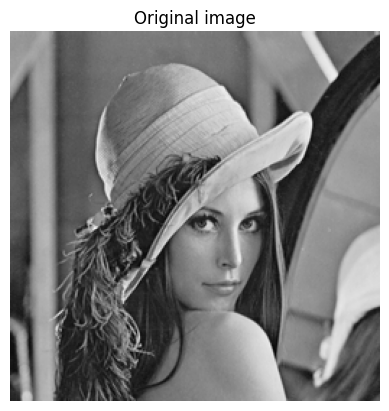

In [ ]:
image = load_image('images/lenna.png')

print("Image shape:", image.shape)
print("Image dtype:", image.dtype)
print("Image size:", image.size)

plt.imshow(image, cmap='gray')
plt.title(f'Original image')
plt.axis('off')
plt.show()

In [4]:
blocks = blockify(image, 8, 8)
print("Blocks shape:", blocks.shape)
print("Blocks dtype:", blocks.dtype)


Blocks shape: (32, 32, 8, 8)
Blocks dtype: uint8


In [5]:
flattened_blocks = blocks.reshape(-1, 8*8)
print("Flattened blocks shape:", flattened_blocks.shape)

Flattened blocks shape: (1024, 64)


In [6]:
centered_blocks, mean_vector = mean_center(flattened_blocks)
centered_blocks /= np.std(centered_blocks)

In [7]:
gha = GHA(input_dim=64, num_components=16, learning_rate=0.001)
gha.train(centered_blocks, epochs=100)
components = gha.get_components() 
print("Components shape:", components.shape)
print(components)

Components shape: (16, 64)
[[ 0.10093275  0.11290509  0.12878829 ...  0.12961956  0.13663012
   0.12715651]
 [-0.17875981 -0.15193596 -0.10823973 ...  0.10158085  0.14342638
   0.16712747]
 [-0.07365119 -0.10203886 -0.11794311 ...  0.20792855  0.19673604
   0.16860248]
 ...
 [-0.08348096 -0.1692011  -0.13499756 ... -0.12425001 -0.1169925
  -0.05337403]
 [-0.04193857 -0.04022176 -0.03370549 ...  0.10475963  0.13379458
  -0.03929602]
 [-0.00978062 -0.04149981 -0.07406156 ... -0.14805113 -0.14489276
  -0.1207728 ]]


In [8]:
seq_components = sequential_gha(X=centered_blocks, num_components=16, learning_rate=0.001, max_epochs=100)
print("Sequential components shape:", seq_components.shape)
print(seq_components)

🔹 Training component 1/16
🔹 Training component 2/16
🔹 Training component 3/16
🔹 Training component 4/16
🔹 Training component 5/16
🔹 Training component 6/16
🔹 Training component 7/16
🔹 Training component 8/16
🔹 Training component 9/16
🔹 Training component 10/16
🔹 Training component 11/16
🔹 Training component 12/16
🔹 Training component 13/16
🔹 Training component 14/16
🔹 Training component 15/16
🔹 Training component 16/16
Sequential components shape: (16, 64)
[[ 0.10754852  0.11814806  0.12421894 ...  0.12121349  0.11679489
   0.11126551]
 [-0.16784367 -0.14547237 -0.10870569 ...  0.11238618  0.15332672
   0.17783985]
 [ 0.0618515   0.09014172  0.10848783 ... -0.20962285 -0.19520296
  -0.1646736 ]
 ...
 [ 0.01986638 -0.00955511  0.00364915 ...  0.17574319  0.20853586
  -0.02828565]
 [-0.1943325  -0.1385183  -0.00631915 ...  0.09306894 -0.07045644
  -0.05202472]
 [-0.07575408 -0.08022093  0.07244093 ...  0.14907587 -0.12197808
  -0.22320953]]


In [9]:
encoded_blocks = encode_blocks(flattened_blocks, mean_vector, components)
print(f"Encoded shape: {encoded_blocks.shape}")  # should be (1024, k)

Encoded shape: (1024, 16)


In [10]:
seq_encoded_blocks = encode_blocks(flattened_blocks, mean_vector, seq_components)
print(f"Encoded shape: {seq_encoded_blocks.shape}")  # should be (1024, k)

Encoded shape: (1024, 16)


In [14]:
reconstructed_image = reconstruct_image(encoded_blocks, mean_vector, components)

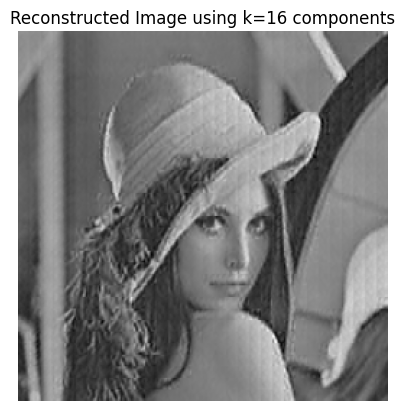

In [15]:
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f'Reconstructed Image using k={components.shape[0]} components')
plt.axis('off')
plt.show()

In [16]:
seq_reconstructed_image = reconstruct_image(seq_encoded_blocks, mean_vector, components)

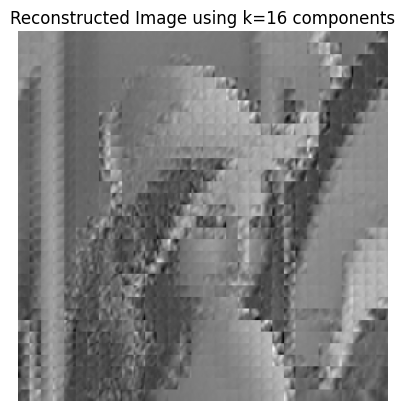

In [18]:
plt.imshow(seq_reconstructed_image, cmap='gray')
plt.title(f'Reconstructed Image using k={seq_components.shape[0]} components')
plt.axis('off')
plt.show()

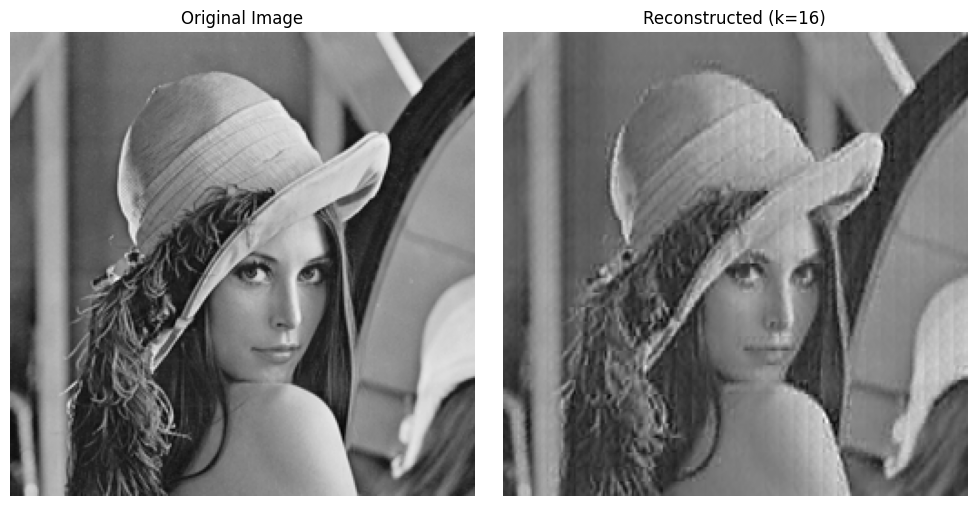

In [20]:
show_original_vs_reconstructed(image, reconstructed_image, k=16)

Components shape: (8, 64)
Encoded shape: (1024, 8)


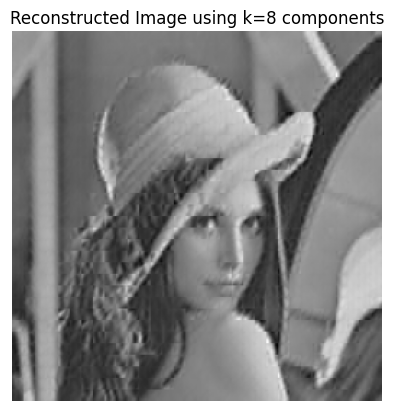

Components shape: (16, 64)
Encoded shape: (1024, 16)


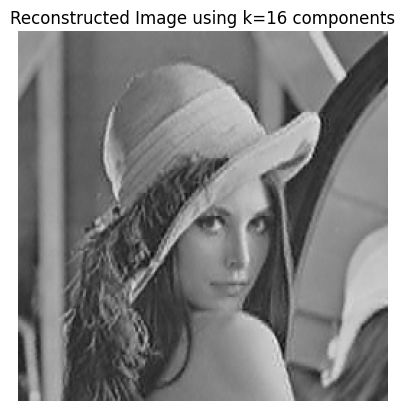

Components shape: (32, 64)
Encoded shape: (1024, 32)


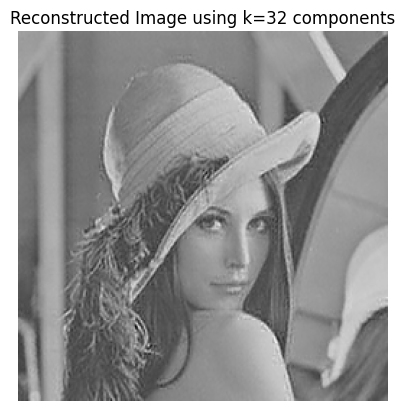

Components shape: (48, 64)
Encoded shape: (1024, 48)


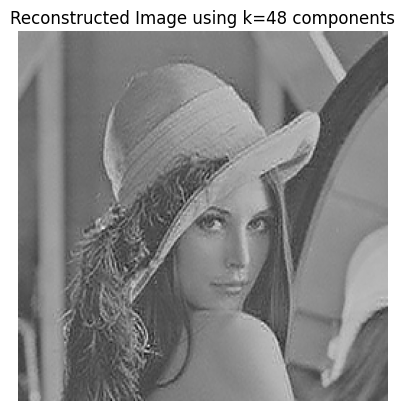

In [26]:
for k in (8, 16, 32, 48):
    gha = GHA(input_dim=64, num_components=k, learning_rate=0.001)
    gha.train(centered_blocks, epochs=500)

    components = gha.get_components() 
    print("Components shape:", components.shape)
    #print(components)

    encoded_blocks = encode_blocks(flattened_blocks, mean_vector, components)
    print(f"Encoded shape: {encoded_blocks.shape}")  # should be (1024, k)

    reconstructed_flat = reconstruct_blocks(encoded_blocks, mean_vector, components)
    reconstructed_blocks = reshape_blocks(reconstructed_flat)
    reconstructed_image = blocks_to_image(reconstructed_blocks)

    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image using k={k} components')
    plt.axis('off')
    plt.show()
    